In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
import os

import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import yass
from yass import preprocess
from yass import process
from yass.neuralnet import NeuralNetDetector

from neural_noise.explorer import (SpikeTrainExplorer,
                                   RecordingExplorer)


import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

In [3]:
logging.basicConfig(level=logging.ERROR)

In [5]:
yass.set_config('../ej49_config.yaml')

cfg = yass.read_config()

In [6]:
score, clear_index, spike_times = preprocess.run()

In [7]:
spike_train, spike_left, templates = process.run(score,
                                                 clear_index,
                                                 spike_times)

100% (8 of 8) |###########################| Elapsed Time: 0:00:09 Time: 0:00:09
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


In [8]:
path_to_recordings = os.path.join(cfg.root, 'tmp/standarized.bin')
path_to_geometry = os.path.join(cfg.root, cfg.geomFile)

In [9]:
nnd = NeuralNetDetector(cfg)
proj = nnd.load_w_ae()

In [10]:
explorer_rec = RecordingExplorer(path_to_recordings,
                                 path_to_geometry,
                                 dtype='float64',
                                 window_size=cfg.spikeSize,
                                 n_channels=cfg.nChan,
                                 neighbor_radius=cfg.spatialRadius)

In [11]:
explorer_train = SpikeTrainExplorer(templates,
                                    spike_train,
                                    explorer_rec,
                                    proj)

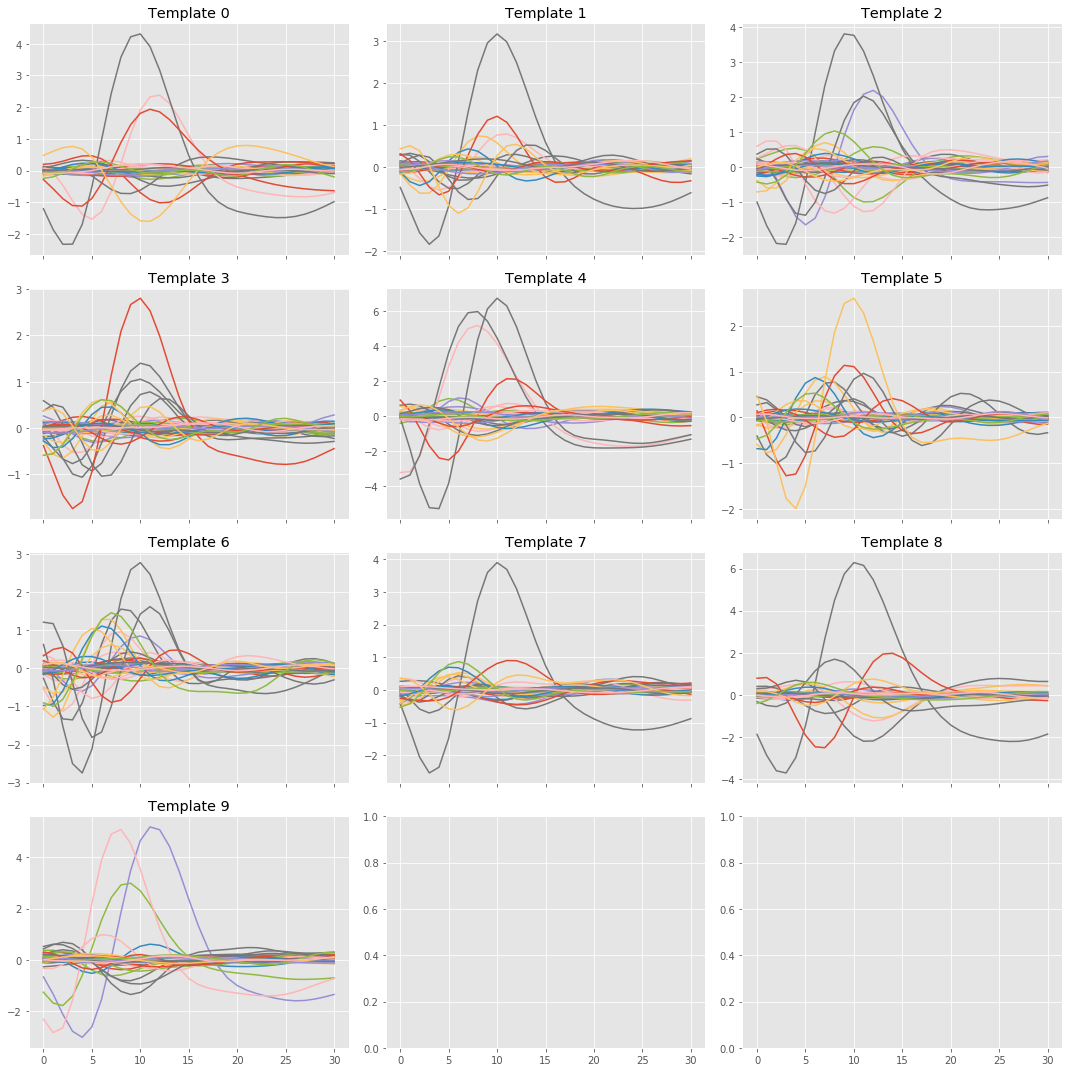

In [12]:
explorer_train.plot_templates(range(10))